# Decision trees
Problem: Titanic survival prediction challenge

# Learning Goals 
- How to pre-process the data<br>
<ol> <li> Dropping the non-useful features </li>
    <li> Filling the missing values(Data imputation)</li>
    </ol>
- Creating a binary tree from scratch
        


In [178]:
import numpy as np 
import pandas as pd

data = pd.read_csv("./datasets/train_decisiontree.csv")

data.head(n=10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [179]:
column_drop=["Name", "PassengerId", "Embarked","Cabin", "Ticket"]

data_clean=data.drop(axis=1,
    columns=column_drop)
data_clean.head(n=10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])
data_clean.head(n=10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [181]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [182]:
data_clean.loc[1][3] #we use this in pandas instead of data_clean which will give an error unlike numpy
data_clean["Age"]=data_clean.fillna(data_clean["Age"].mean())["Age"]
data_clean.info() # All the nans have been erased in age and replaced by the average of all other ages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [183]:

input_col=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
output_col=["Survived"]

X= data_clean[input_col]
Y= data_clean[output_col]

print(X.shape, Y.shape)
print(type(X), type(Y))


(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# Define entropy and information gain

In [184]:
def entropy(col):
    N= col.shape[0]
    count = np.unique(col, return_counts= True)
    entropy = 0.0
    for ix in count[1]:
        p = ix/N
        entropy+= (-1.0)*(p)*(np.log2(p))
    return entropy





In [185]:
def divide_data(X, fval, fkey):
    # work directly in the pandas dataframe
    X_right= pd.DataFrame([], columns= X.columns)
    X_left = pd.DataFrame([], columns= X.columns)
    
    for ix in range(X.shape[0]):
        val= X[fkey].loc[ix]
        
        if(val>fval):
            
            X_right=X_right.append(X.loc[ix])
            
        else:
            X_left=X_left.append(X.loc[ix])
    return X_left, X_right
        
'''left , right= divide_data(data_clean[:10], 0.5, "Sex")
print(left)
print(right)'''

'left , right= divide_data(data_clean[:10], 0.5, "Sex")\nprint(left)\nprint(right)'

In [186]:
def info_gain(data, fval, fkey):
    #print(fkey)
    left , right= divide_data(data, fval, fkey)
    
    # fraction of total samples in the left and right group
    l = float(left.shape[0]/data.shape[0])
    r = float(right.shape[0]/data.shape[0])
    
    # if all the samples are in one group
    if l==0 or r==0 :
        return -1000000
    
    i_gain= entropy(data.Survived)- (l*entropy(left.Survived) + r* entropy(right.Survived))
    return i_gain
    
    

In [187]:
for ix in data_clean.columns:
    print(ix)
    print(info_gain(data_clean, data_clean[ix].mean(), ix))

Survived
0.9607079018756469
Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [188]:
class DecisionTree:
    
    def __init__ (self, depth=0 , max_depth= 5):
        self.fkey= None
        self.fval=None
        self.left= None
        self.right= None
        self.depth= depth
        self.max_depth= max_depth
        self.target= None
    
    def train(self, X_train):
        features=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
        i_gain=[]
        
        for ix in features:
            gain= info_gain(X_train,  X_train[ix].mean(),ix)
            i_gain.append(gain)
        self.fkey= features[np.argmax(i_gain)]
        self.fval= X_train[self.fkey].mean()
        print("making tree dividing feature is", self.fkey)
        #split data
        data_left, data_right= divide_data(X_train , self.fval, self.fkey)
        
        #to correct the numbering of the data that is split i.e. make it 1,2, 3, 4,instead of 2,5,6 etc 
        data_left= data_left.reset_index(drop=True)
        data_right= data_right.reset_index(drop=True)
        
        # If node can't be divided further
        if( (data_left.shape[0]==0) or (data_right.shape[0]==0)):
            if(X_train.Survived.mean()>= 0.5):
                self.target= "Survive"
            else :
                self.target="Dead"
            return 
        
        
        # If depth is more than max_depth then to prevent overfitting
        if(self.depth>self.max_depth):
            if(X_train.Survived.mean()>= 0.5):
                self.target= "Survive"
            else :
                self.target="Dead"
            return 
        
        #Recursive case
        self.left= DecisionTree(depth= self.depth+1, max_depth= self.max_depth)
        self.left.train(data_left)
        
        self.right= DecisionTree(depth= self.depth+1, max_depth= self.max_depth)
        self.right.train(data_right)
        
        # Set target value for each node
        
        if(X_train.Survived.mean()>= 0.5):
            self.target= "Survive"
        else :
            self.target="Dead"
        return
    def predict(self, test):
        if( test[self.fkey]>self.fval):
            if(self.right is None):
                return self.target
            else :
                return self.right.predict(test)
        else :
            if(self.left is None):
                return self.target
            else :
                return self.left.predict(test)
    
        
        
        
            

# Train- Test -validation split

In [189]:
split= int(0.7* data_clean.shape[0])
Xt= data_clean[:split]
XT= data_clean[split:]

XT=XT.reset_index(drop= True)
XT.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,21.0,0,0,7.8542
1,0,3,1,21.0,0,0,16.1000
2,0,1,1,61.0,0,0,32.3208
3,0,2,1,57.0,0,0,12.3500
4,1,1,0,21.0,0,0,77.9583


In [190]:
d= DecisionTree()
d.train(Xt)


making tree dividing feature is Sex
making tree dividing feature is Pclass
making tree dividing feature is Age
making tree dividing feature is SibSp
making tree dividing feature is Pclass
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is SibSp
making tree dividing feature is Parch
making tree dividing feature is Pclass
making tree dividing feature is Pclass
making tree dividing feature is Pclass
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is SibSp
making tree dividing feature is Fare
making tree dividing feature is Parch
making tree dividing feature is Pclass
making tree dividing feature is Pclass
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is Age
making tree dividing feature is 

In [192]:
print(d.fkey)
print(d.fval)

Sex
0.6292134831460674


In [193]:
y_pred=[]

for ix in range(XT.shape[0]):
    pred= d.predict(XT.loc[ix])
    y_pred.append(pred)

le = LabelEncoder()

y_pred = le.fit_transform(y_pred)
print(y_pred)


[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [194]:
y_actual= XT[output_col]
print(y_actual.shape)
print(y_pred.shape)
y_pred= np.array(y_pred).reshape((-1, 1))
print(y_pred.shape)

(268, 1)
(268,)
(268, 1)


In [195]:
accuracy = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]*100
print(accuracy)

81.34328358208955


# Decision trees using sklearn

In [196]:
from sklearn.tree import DecisionTreeClassifier

sk_tree= DecisionTreeClassifier(criterion='entropy',
    max_depth=5)
input_col=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
output_col=["Survived"]

sk_tree.fit(Xt[input_col], Xt[output_col])

y= sk_tree.predict(XT[input_col])
print(y)


[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0]


In [197]:
sk_tree.score(XT[input_col], XT[output_col])

0.8283582089552238

# Random forests

In [210]:
Xtrain= Xt[input_col]
Ytrain= np.array(Xt[output_col]).reshape((-1,))
Xtest = XT[input_col]
Ytest= np.array(XT[output_col]).reshape((-1,))

In [225]:
sk_tree= DecisionTreeClassifier(criterion='entropy',
    max_depth=5)
sk_tree.fit(Xtrain, Ytrain)
print(sk_tree.score(Xtest, Ytest))
print(sk_tree.score(Xtrain,Ytrain))

0.8283582089552238
0.8443017656500803


In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [232]:
rf = RandomForestClassifier(n_estimators=10,
    criterion='entropy',
    max_depth=7,
   )


In [233]:
rf.fit(Xtrain,Ytrain,)
print(rf.score(Xtrain,Ytrain))
print(rf.score(Xtest,Ytest))

0.8876404494382022
0.8097014925373134


In [252]:
acc_list= []
for i in range (50):
    acc= cross_val_score(RandomForestClassifier(n_estimators= i+1 , criterion= 'entropy', max_depth= 5), Xtrain, Ytrain, cv=5).mean()
    acc_list.append(acc)
print(acc_list)

[0.7674011264720942, 0.7899664106502817, 0.7851027137736815, 0.7833747055811571, 0.7803535074244751, 0.7978525345622121, 0.8154914490527394, 0.8042136200716847, 0.8010009216589861, 0.8122015360983103, 0.8186783410138249, 0.7947670250896057, 0.8075799283154123, 0.8059160266257039, 0.7979285202252944, 0.8171039426523297, 0.8170013312852022, 0.8027414234511008, 0.8074652329749105, 0.7994775217613926, 0.8074271377368152, 0.8122908346134153, 0.8011162314388122, 0.8091672299027138, 0.8122781362007168, 0.8058781362007169, 0.8074781362007168, 0.8187295442908347, 0.8122783410138249, 0.821878955453149, 0.818563236047107, 0.8170912442396313, 0.817168049155146, 0.8106267281105991, 0.8122271377368152, 0.8090271377368152, 0.8187168458781361, 0.8154654377880185, 0.8187297491039427, 0.8154398361495137, 0.825078955453149, 0.8170400409626216, 0.8234275473630313, 0.8266916538658474, 0.8170785458269328, 0.8186656426011265, 0.8138654377880183, 0.8235043522785459, 0.8234787506400411, 0.8219043522785459]


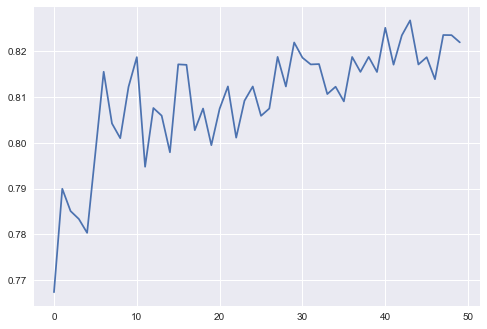

In [253]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [254]:
np.argmax(acc_list)

43

In [256]:
rf = RandomForestClassifier(n_estimators=43,
    criterion='entropy',
    max_depth=7,
   )
rf.fit(Xtrain,Ytrain,)
print(rf.score(Xtrain,Ytrain))
print(rf.score(Xtest,Ytest))


0.884430176565008
0.832089552238806
